In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [2]:
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go

#Initialize plotly
init_notebook_mode(connected= True)

In [3]:
from fbprophet import Prophet

import logging
logging.getLogger().setLevel(logging.ERROR)

In [4]:
df = pd.read_csv('../../data/FB_data.csv')
df = df[['date', 'close']].reset_index(drop=True)
df = df.rename({'close':'y', 'date':'ds'}, axis='columns')
df['ds'] = pd.to_datetime(df['ds'])

In [5]:
df.head(15)

,ds,y
0,2013-02-08,28.5450
1,2013-02-11,28.2600
2,2013-02-12,27.3700
3,2013-02-13,27.9075
4,2013-02-14,28.5000
5,2013-02-15,28.3200
6,2013-02-19,28.9300
7,2013-02-20,28.4620
8,2013-02-21,27.2830
9,2013-02-22,27.1300


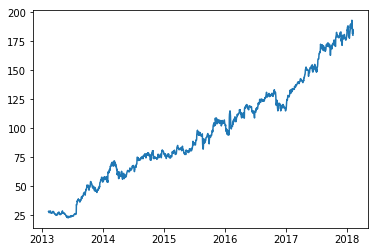

In [6]:
plt.plot(df.ds, df.y)

In [7]:
df_train = df[df.ds < pd.datetime(2017, 9, 1)]
df_train.tail(3)

,ds,y
1147,2017-08-29,168.05
1148,2017-08-30,169.92
1149,2017-08-31,171.97


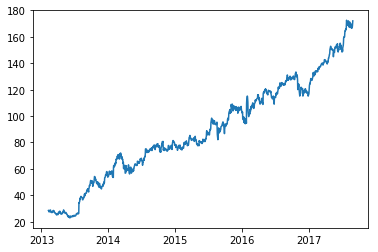

In [8]:
plt.plot(df_train.ds, df_train.y)

In [9]:
def plotly_df(x, y, title=''):
    """Visualize all the dataframe columns as line plots."""
    common_kw = dict(x=df.index, mode='lines')
    #data = [go.Scatter(y=df[c], name=c, **common_kw) for c in df.columns]
    data = [go.Scatter(y=y, x = x, mode='lines')]
    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

In [10]:
plotly_df(df_train.ds, df_train.y, title = 'stock market')

In [11]:
df_test = df[df.ds >= pd.datetime(2017, 9, 1)]
df_test.tail(3)

,ds,y
1256,2018-02-05,181.26
1257,2018-02-06,185.31
1258,2018-02-07,180.18


In [12]:
plotly_df(df_test.ds, df_test.y, title='Test part of the stock market')

In [13]:
model = Prophet()
model.fit(df_train)

C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [14]:
prediction_size = df_test.y.size
print(prediction_size)

109


In [16]:
#future = model.make_future_dataframe(periods = prediction_size, include_history = False)
#future.tail(3)
future = df[-prediction_size:].drop(['y'], axis = 1).copy()
future.tail(3)

,ds
1256,2018-02-05
1257,2018-02-06
1258,2018-02-07


In [17]:
forecast = model.predict(future)
forecast.tail(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
106,2018-02-05,185.554665,170.928196,195.189097,174.946120,198.253186,-3.801795,-3.801795,-3.801795,0.177752,0.177752,0.177752,-3.979547,-3.979547,-3.979547,0.0,0.0,0.0,181.752870
107,2018-02-06,185.691489,171.050573,195.880398,174.957651,198.494950,-3.673456,-3.673456,-3.673456,0.170156,0.170156,0.170156,-3.843613,-3.843613,-3.843613,0.0,0.0,0.0,182.018032
108,2018-02-07,185.828312,171.416968,195.342147,175.022100,198.760252,-3.414882,-3.414882,-3.414882,0.300753,0.300753,0.300753,-3.715634,-3.715634,-3.715634,0.0,0.0,0.0,182.413430


In [24]:
forecast.index = df_test.index
forecast.tail(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1256,2018-02-05,185.554665,170.928196,195.189097,174.946120,198.253186,-3.801795,-3.801795,-3.801795,0.177752,0.177752,0.177752,-3.979547,-3.979547,-3.979547,0.0,0.0,0.0,181.752870
1257,2018-02-06,185.691489,171.050573,195.880398,174.957651,198.494950,-3.673456,-3.673456,-3.673456,0.170156,0.170156,0.170156,-3.843613,-3.843613,-3.843613,0.0,0.0,0.0,182.018032
1258,2018-02-07,185.828312,171.416968,195.342147,175.022100,198.760252,-3.414882,-3.414882,-3.414882,0.300753,0.300753,0.300753,-3.715634,-3.715634,-3.715634,0.0,0.0,0.0,182.413430


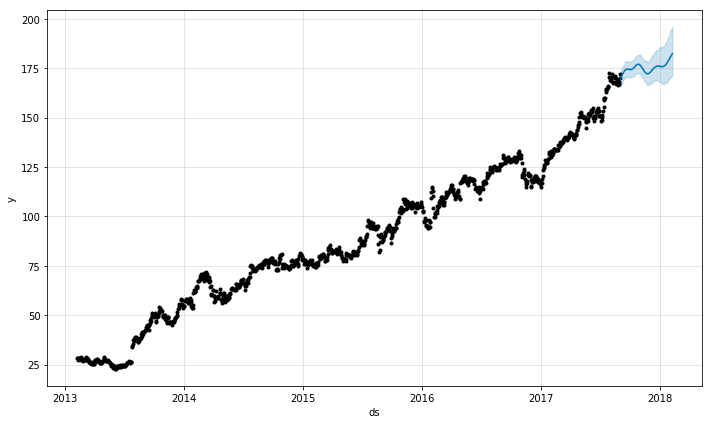

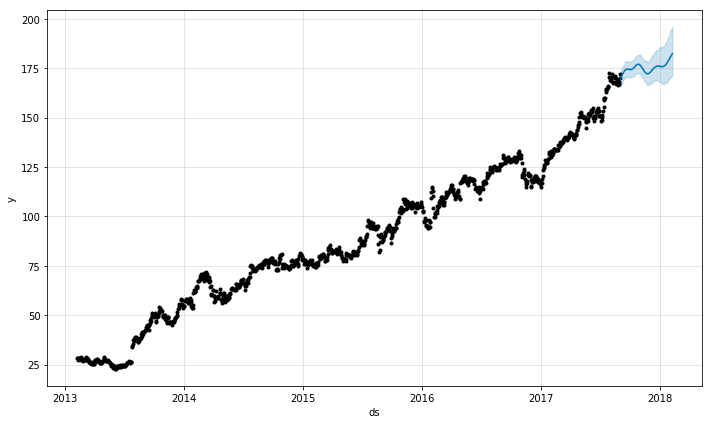

In [25]:
model.plot(forecast)

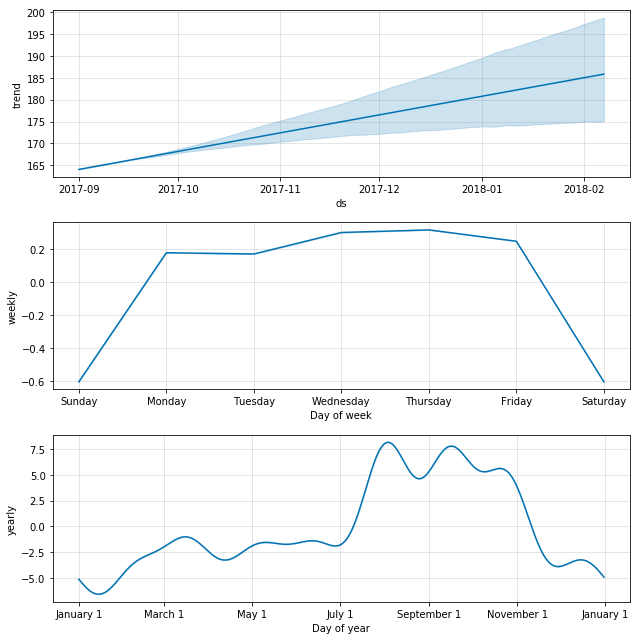

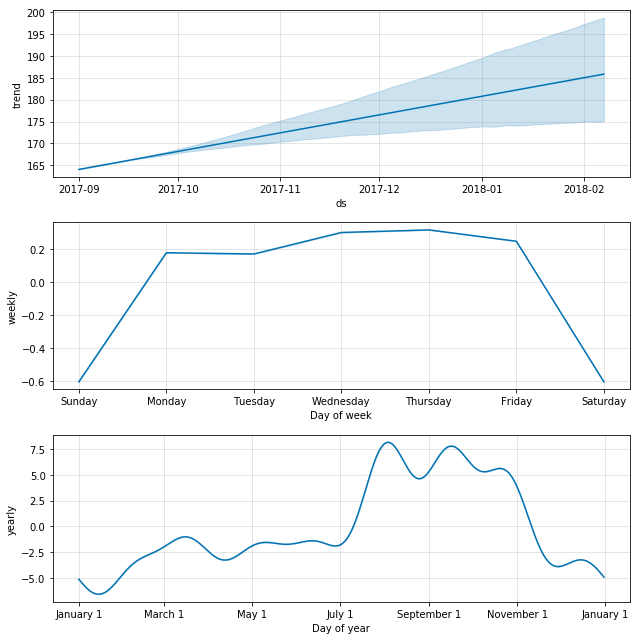

In [26]:
model.plot_components(forecast)

In [27]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [28]:
df.tail(3)

,ds,y
1256,2018-02-05,181.26
1257,2018-02-06,185.31
1258,2018-02-07,180.18


In [29]:
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1150,2017-09-01,164.073424,165.446679,173.500800,164.073424,164.073424,5.622443,5.622443,5.622443,0.247611,0.247611,0.247611,5.374832,5.374832,5.374832,0.0,0.0,0.0,169.695867
1151,2017-09-05,164.620717,167.148570,174.908418,164.620717,164.620717,6.403260,6.403260,6.403260,0.170156,0.170156,0.170156,6.233104,6.233104,6.233104,0.0,0.0,0.0,171.023977
1152,2017-09-06,164.757540,167.459135,175.330712,164.757540,164.757540,6.756497,6.756497,6.756497,0.300753,0.300753,0.300753,6.455745,6.455745,6.455745,0.0,0.0,0.0,171.514037


In [30]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.head(5)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2017-09-01,169.695867,165.446679,173.500800,172.02
2017-09-05,171.023977,167.148570,174.908418,170.72
2017-09-06,171.514037,167.459135,175.330712,172.09
2017-09-07,171.883496,167.738545,175.586192,173.21
2017-09-08,172.158283,168.292303,175.975387,170.95


In [31]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [32]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 2.577188469216762
MAE 4.62914346555279


In [33]:
def show_forecast(cmp_df, num_predictions, num_values, title):
    """Visualize the forecast."""
    
    def create_go(name, column, num, **kwargs):
        points = cmp_df.tail(num)
        args = dict(name=name, x=points.index, y=points[column], mode='lines')
        args.update(kwargs)
        return go.Scatter(**args)
    
    lower_bound = create_go('Lower Bound', 'yhat_lower', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="gray"))
    upper_bound = create_go('Upper Bound', 'yhat_upper', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="gray"),
                            fillcolor='rgba(68, 68, 68, 0.3)', 
                            fill='tonexty')
    forecast = create_go('Forecast', 'yhat', num_predictions,
                         line=dict(color='rgb(31, 119, 180)'))
    actual = create_go('Actual', 'y', num_values,
                       marker=dict(color="red"))
    
    # In this case the order of the series is important because of the filling
    data = [lower_bound, upper_bound, forecast, actual]

    layout = go.Layout(yaxis=dict(title='Price'), title=title, showlegend = False)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

show_forecast(cmp_df, prediction_size, 100, 'New stock prices')

In [34]:
show_forecast(cmp_df, prediction_size, 500, 'New stock prices')